# Least Squared with SMOTE

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy
from sympy import Matrix
from IPython.display import display, Math
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
scaled = MinMaxScaler()
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)
from imblearn.over_sampling import SMOTE

In [2]:
def prec_mat(y,yhat):
    
    y_true = len(y[y==1])
    y_false = len(y[y==-1])
    
    yhat_true = len(yhat[yhat==1])
    yhat_false = len(yhat[yhat==-1])
    
    error = y - yhat
    
    inc_true = len(error[error==2])
    inc_false = len(error[error==-2])
    
    cor_true = y_true - inc_true
    cor_false = y_false - inc_false
    
    y_mat = np.array([[cor_true/y_true,inc_false/y_false],[inc_true/y_true,cor_false/y_false]])
  
    return y_mat
    

def error_frac(X_train,y_train,X_eval,y_eval):
    
    w = np.linalg.inv(X_train.T@X_train)@X_train.T@y_train
    y_hat = np.sign(X_eval@w)
    error = np.count_nonzero(y_eval-y_hat)/len(y_eval)
    
    return error

def cross_val(X,y,splits):

    error = np.zeros(splits)

    X_splits = np.array_split(X,splits)
    y_splits = np.array_split(y,splits)

    for j in range(splits):
        X_eval_split = X_splits[j]
        y_eval_split = y_splits[j]
        X_train_split = np.concatenate(np.delete(X_splits,j,0))
        y_train_split = np.concatenate(np.delete(y_splits,j,0))
        error[j] = error_frac(X_train_split,y_train_split,X_eval_split,y_eval_split)

    avg_error = np.mean(error)
    
    return avg_error

splits = 10

## Load and Process Data

In [3]:
data = pd.read_csv('nasa_train.csv')

In [4]:
data

,Absolute Magnitude,Est Dia in KM(max),Relative Velocity km per sec,Miss Dist.(kilometers),Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous
0,21.6,0.284472,6.115834,62753692.0,5,0.025282,4.634,2458000.5,0.425549,1.407011,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,1
1,21.3,0.326618,18.113985,57298148.0,3,0.186935,5.457,2458000.5,0.351674,1.107776,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,-1
2,20.3,0.517654,7.590711,7622911.5,0,0.043058,4.557,2458000.5,0.348248,1.458824,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,1
3,27.4,0.019681,11.173874,42683616.0,6,0.005512,5.093,2458000.5,0.216578,1.255903,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,-1
4,21.6,0.284472,9.840831,61010824.0,1,0.034798,5.154,2458000.5,0.210448,1.225615,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4213,26.3,0.032662,17.278498,58247436.0,8,0.040471,6.696,2454418.5,0.225074,0.881848,7.243616,43.263028,302.474700,0.683367,155.100937,1.080329,2.454529e+06,228.373430,1.190182,-1
4214,20.7,0.430566,26.016058,25067180.0,1,0.121499,3.843,2458000.5,0.652899,1.706178,23.893424,145.035928,814.019755,0.592216,110.720210,2.820140,2.457597e+06,178.503886,0.442250,-1
4215,23.9,0.098637,22.154265,6187511.0,8,0.019777,5.156,2457637.5,0.361512,1.161429,39.880491,164.183305,457.179984,0.741558,276.395697,1.581299,2.457708e+06,304.306025,0.787436,-1
4216,22.7,0.171412,7.191642,9126775.0,6,0.059973,4.410,2458000.5,0.368055,1.528234,4.405467,37.026468,690.054279,0.965760,274.692712,2.090708,2.458300e+06,203.501147,0.521698,-1


### Scale Features and Implement SMOTE

In [5]:
y_pre = data.Hazardous.values.reshape(-1,1)
X_pre = data.drop(['Hazardous'],axis=1).values
X_pre = scaled.fit_transform(X_pre)
sm = SMOTE(random_state = 2) 
X, y = sm.fit_sample(X_pre, y_pre.ravel()) 

## All Feature Least Squared

### Without Cross Validation

In [6]:
w = np.linalg.inv(X.T@X)@X.T@y
display(Matrix(np.round(w,1)))

Matrix([
[ -5.2],
[ -9.4],
[ -0.1],
[  0.1],
[ -0.5],
[ -3.9],
[ -0.5],
[  0.7],
[  0.5],
[-92.3],
[  0.0],
[  0.0],
[  4.0],
[ 12.5],
[  0.0],
[ 80.8],
[ -0.9],
[  0.1],
[ -0.1]])

In [7]:
yhat = np.reshape(np.sign(X_pre@w),y_pre.shape)
err = y_pre - yhat
error = np.count_nonzero(err)/len(err)
print('The error using all features without cross validation is',np.round(error*100,1),'%')
conf_mat = prec_mat(y_pre,yhat)
display(Matrix(np.round(conf_mat*100,1)))

The error using all features without cross validation is 13.7 %


Matrix([
[98.4, 16.0],
[ 1.6, 84.0]])

Based on the confusion matrix, it can be seen the model is able to accurately predict that an asteroid is hazardous but cannot as accurately predict that an asteroid is not hazardous. This is the opposite case when SMOTE was not used.

## Feature Selection with Least Sqaured

### Ranking Features

In [8]:
least_feat = np.zeros(X.shape[1],dtype=int)

X_del = copy.copy(X)

for k in range(X.shape[1]):

    avg_error = np.zeros(X_del.shape[1])
    
    for i in range(X_del.shape[1]):

        X_del_1 = np.delete(X_del,i,axis=1)

        avg_error[i] = cross_val(X_del_1,y,splits)

    least_feat[k] = np.argmin(avg_error)
    
    X_del = np.delete(X_del,least_feat[k],axis=1)

least_feat = least_feat.tolist()

least_feat_sort = np.zeros(len(least_feat),dtype=int)
least_feat_sort = least_feat_sort.tolist()

least_feat_sort[0] = least_feat[0]  

all_int = list(range(0, X.shape[1]))

all_int.remove(least_feat_sort[0])
    
for i in range(1,len(least_feat)):
    
    least_feat_sort[i] = all_int[least_feat[i]]
    all_int.pop(least_feat[i])
    
best_feat = np.flip(np.array(least_feat_sort))
print('Ranked Features:', best_feat)

Ranked Features: [15  9 13  0  5  2 10  3  1  4  8 11 12 17 14 18  6  7 16]


In [9]:
avg_error = np.zeros(X.shape[1])

for i in range(len(best_feat)):
    
    delete_feat = np.delete(np.arange(X.shape[1]),best_feat[0:i+1])
    X_del = np.delete(X,delete_feat,axis=1)
        
    avg_error[i] = cross_val(X_del,y,splits)

best_comb = np.argmin(avg_error)

### Selection

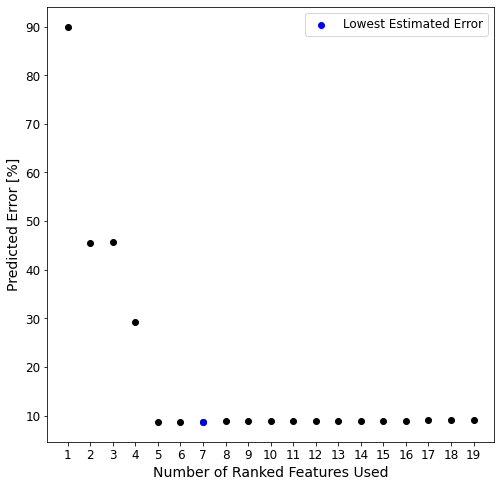

In [10]:
plt.figure(figsize=(8,8))
plt.rc('font', size=12)
plt.scatter(np.arange(0,19)+1,avg_error*100,color='k', marker='o', alpha=1)
plt.scatter(best_comb+1,avg_error[best_comb]*100,color='b', marker='o', alpha=1,label='Lowest Estimated Error')
plt.xlabel('Number of Ranked Features Used',fontsize=14)
plt.xticks(np.arange(0,19)+1)
plt.ylabel('Predicted Error [%]',fontsize=14)
plt.legend(fontsize=12)
plt.show()

Looking at the graph above, the lowest error occurs using the 7 most imporartant features.
However, using just 5 of the most important features provides a comparable error.

## Final Training

In [11]:
data.drop(['Est Dia in KM(max)','Relative Velocity km per sec','Miss Dist.(kilometers)','Orbit Uncertainity',
           'Jupiter Tisserand Invariant','Epoch Osculation','Eccentricity','Inclination','Asc Node Longitude','Orbital Period',
           'Perihelion Arg','Perihelion Time','Mean Anomaly','Mean Motion'],axis=1,inplace=True)

In [12]:
scaled = MinMaxScaler()
y_pre = data.Hazardous.values.reshape(-1,1)
X_final_pre = data.drop(['Hazardous'],axis=1).values
X_final_pre = scaled.fit_transform(X_final_pre)
X_final, y = sm.fit_sample(X_final_pre, y_pre.ravel()) 

In [13]:
w_final = np.linalg.inv(X_final.T@X_final)@X_final.T@y
display(Matrix(np.round(w_final,1)))

Matrix([
[ -5.1],
[ -3.9],
[-74.9],
[ 10.3],
[ 68.8]])

In [14]:
error_final = np.count_nonzero(y_pre - np.reshape(np.sign(X_final_pre@w_final),y_pre.shape))/len(y_pre)
print('The error using the 5 most important features is',np.round(error_final*100,1),'%')

The error using the 5 most important features is 13.3 %


In [15]:
yhat = np.reshape(np.sign(X_final_pre@w_final),y_pre.shape)
conf_mat = prec_mat(y_pre,yhat)
display(Matrix(np.round(conf_mat*100,1)))

Matrix([
[99.7, 15.9],
[ 0.3, 84.1]])

While the overall error increased when compared to the case witout SMOTE, the error for the hazardous class is much lower. Based on the confusion matrix, it can be seen the model is able to accurately predict that an asteroid is hazardous but cannot as accurately predict that an asteroid is not hazardous.

## Validation

### Remove one Feature

In [16]:
error = np.zeros(X_final.shape[1])

for i in range(X_final.shape[1]):
    
    delete_feat = i
    X_del = np.delete(X_final,delete_feat,axis=1)
    X_del_pre = np.delete(X_final_pre,delete_feat,axis=1)
    w_del = np.linalg.inv(X_del.T@X_del)@X_del.T@y
    y_hat = np.reshape(np.sign(X_del_pre@w_del),y_pre.shape)
    err = np.count_nonzero(y_pre-y_hat)/len(y_pre)
    error[i] = err

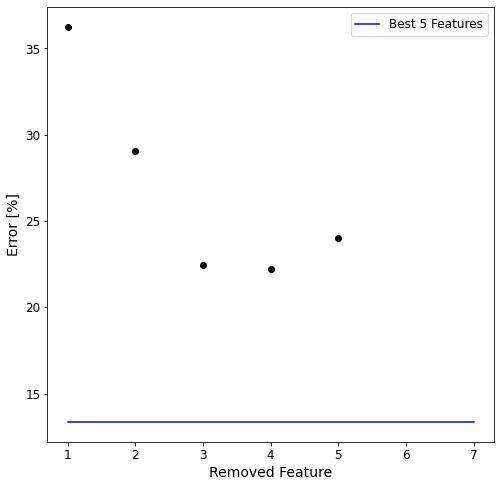

In [17]:
plt.figure(figsize=(8,8))
plt.rc('font', size=12)
plt.scatter(np.arange(X_final.shape[1])+1,error*100,color='k', marker='o', alpha=1)
plt.plot([1,7],[error_final*100,error_final*100],color='b',label='Best 5 Features')
plt.xlabel('Removed Feature',fontsize=14)
plt.xticks(np.arange(7)+1)
plt.ylabel('Error [%]',fontsize=14)
plt.legend()
plt.show()

### Add one Feature

In [18]:
error = []
ind = []

for i in range(X.shape[1]):
    
    if i not in best_feat[:5]:
    
        delete_feat = np.delete(np.arange(0,X.shape[1]),np.hstack((best_feat[:5],np.array([i],dtype=int))))
        X_add = np.delete(X,delete_feat,axis=1)
        X_pre_add = np.delete(X_pre,delete_feat,axis=1)
        w_add = np.linalg.inv(X_add.T@X_add)@X_add.T@y
        y_hat = np.reshape(np.sign(X_pre_add@w_add),y_pre.shape)
        err = np.count_nonzero(y_pre-y_hat)/len(y_pre)
        error.append( err )
        ind.append(i)

error = np.array(error)
ind = np.array(ind)

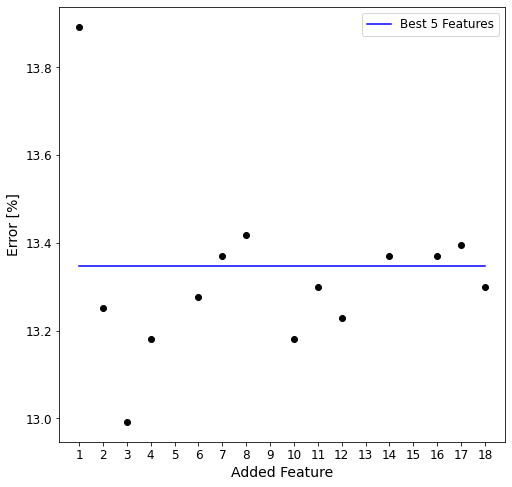

In [21]:
plt.figure(figsize=(8,8))
plt.rc('font', size=12)
plt.scatter(ind,error*100,color='k', marker='o', alpha=1)
plt.plot([1,18],[error_final*100,error_final*100],color='b',label='Best 5 Features')
plt.xlabel('Added Feature',fontsize=14)
plt.xticks(np.arange(18)+1)
plt.ylabel('Error [%]',fontsize=14)
plt.legend()
plt.show()

It can be observed adding any feature to the dataset does not significantly reduce the predicted error. In some cases, adding the feature even increases the expected error. This is consistent with out graph of ranked features and validates the selection of the features.

## Visualization of Chosen Features

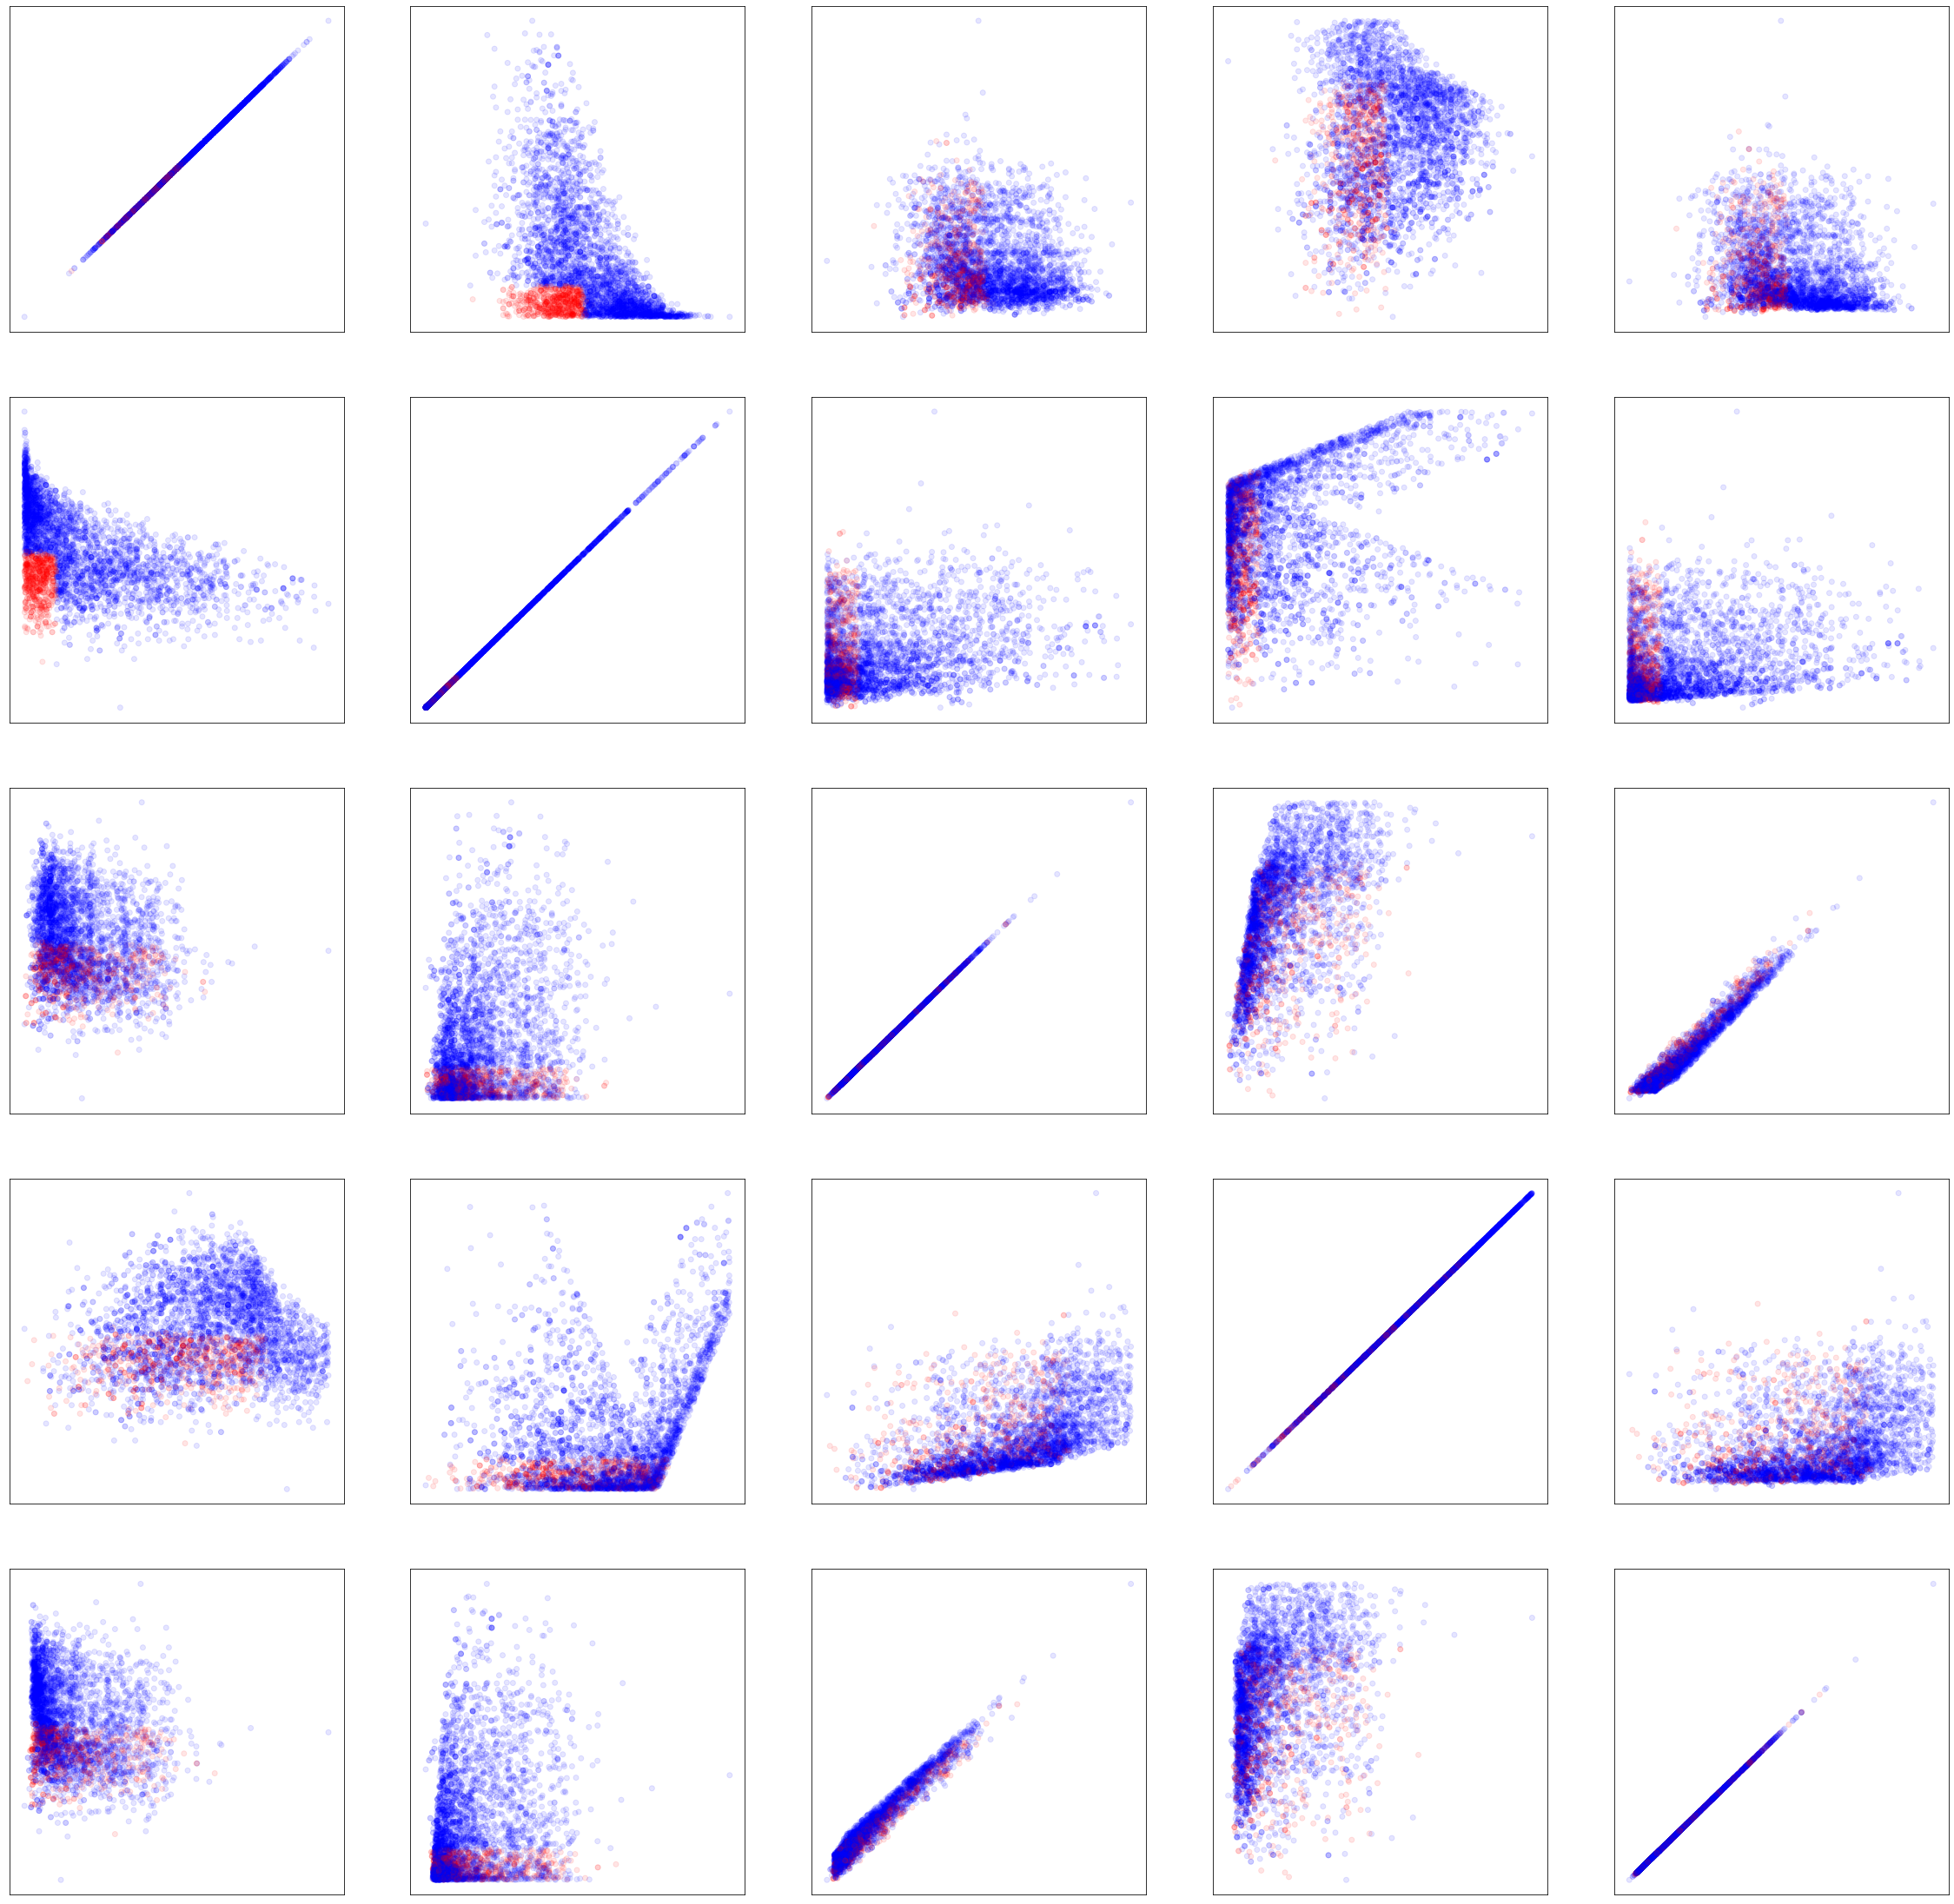

In [20]:
fig = plt.figure(figsize=(40,40))

k = 1

ycolors = ['r' if value > 0 else 'b' for value in y_pre]

for i in range(X_final_pre.shape[1]):
    for j in range(X_final_pre.shape[1]):
        fig.add_subplot(X_final_pre.shape[1],X_final_pre.shape[1], k)
        plt.scatter(X_final_pre[:,i],X_final_pre[:,j],color=ycolors, marker='o', alpha=0.1)
        plt.gca().axes.get_yaxis().set_visible(False)
        plt.gca().axes.get_xaxis().set_visible(False)
        k = k + 1